#### Step 1

importing the needed frameworks

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import pickle
import matplotlib.pyplot as plt
plt.style.use('style_Matplotlib_charts.mplstyle')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### STEP 2

This cell is responsible for loading the training dataset from a CSV file and preparing the data for use in a regression model. It extracts the independent variable (YEAR) and the dependent variable (state_total) from the dataset, reshaping the independent variable into the required format for model training. This step is essential for structuring the data so it can be properly processed by the regression algorithm.

In [20]:
# Create a data frame from the csv file
training_data = pd.read_csv('train_dataset.csv')

x_name = 'YEAR'
y_name = 'state_total'
x = np.array(training_data[x_name]).reshape(-1, 1)
y = np.array(training_data[y_name])


#### Step 3

This cell visualizes the relationship between the independent variable and the dependent variable by plotting the data points as a scatter plot. It then sets up a pipeline for polynomial regression, which includes generating polynomial features, standardizing the data, and applying a linear regression model. This step is crucial for both understanding the data visually and preparing a model that can capture non linear relationships in the dataset.



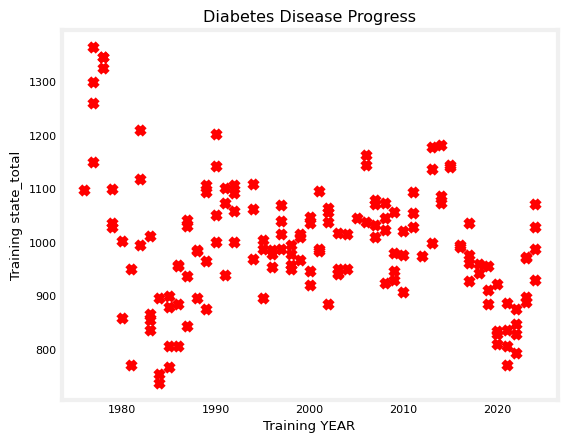

In [21]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Diabetes Disease Progress")
# Set the y-axis label
plt.ylabel(f'Training {training_data[y_name].name}')
# Set the x-axis label
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()


# Create a pipeline with polynomial features and linear regression
degree = 2  # You can try different degrees
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())

#### Step 4

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.

In [22]:

# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

#### Step 5

Plot the features, targets and model (linear regression).

/tmp/ipykernel_28371/29387704.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


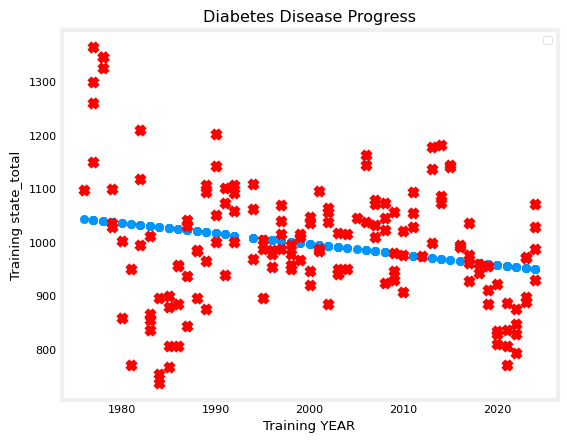

In [23]:
y_pred = my_model.predict(x)
plt.scatter(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.title("Diabetes Disease Progress")
plt.ylabel(f'Training {training_data[y_name].name}')
plt.xlabel(f'Training {training_data[x_name].name}')
plt.legend()
plt.show()

In [26]:
# save the model to disk
filename = 'my_saved_model_v1.sav'
pickle.dump(my_model, open('' + filename, 'wb'))

#### Step 6. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [28]:
# Create a data frame from the csv file
training_data = pd.read_csv('train_dataset.csv')

x_name = ['NSW_total','VIC_total','QLD_total','SA_total','WA_total','TAS_total','ACT_total'] #input multiple types of data, even new ones e.g BGU
y_name = 'YEAR'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

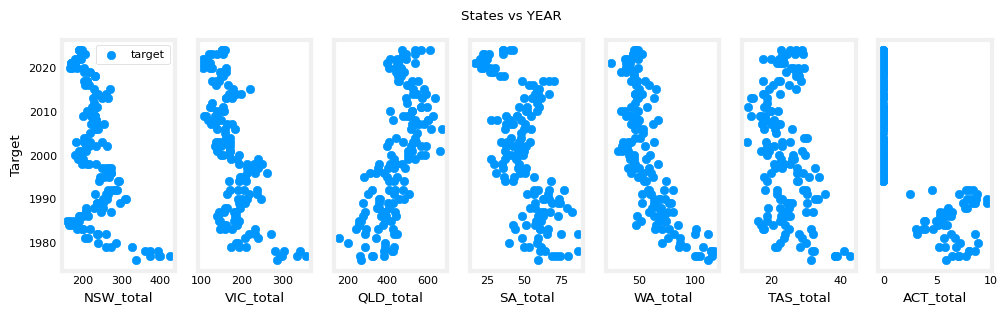

In [29]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'target')
    ax[i].set_xlabel(x_name[i])
ax[0].set_ylabel("Target"); ax[0].legend();
fig.suptitle("States vs YEAR")
plt.show()

In [30]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

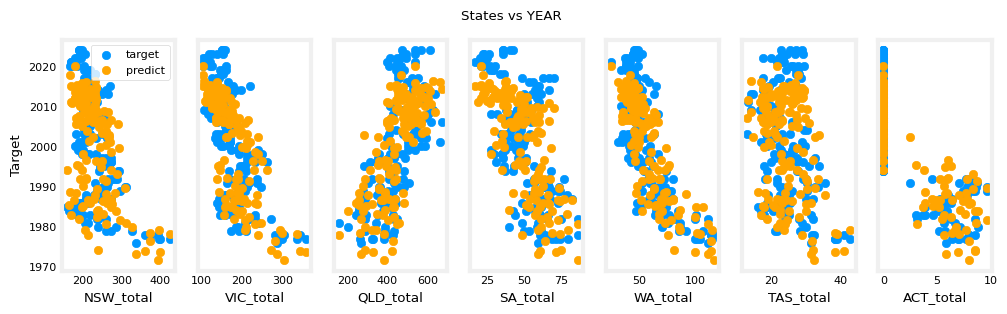

In [31]:
# scatter plot predictions and targets vs original features    
y_pred = my_model.predict(x)
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'target')
    ax[i].set_xlabel(x_name[i])
    ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Target"); ax[0].legend();
fig.suptitle("States vs YEAR")
plt.show()